In [3]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
import os 

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None,
    index_col = False, names = ['age', 'workclass','fnlwgt', 'education','education-unm',
                                'marital-status','occupation','relationship','race','gender',
                                'capital-gain','capital-loss','hours-per-week','native-country','income'])

data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print("원본 특성 :\n",list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n",list(data_dummies.columns))

원본 특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape:{} y.shape: {}".format(X.shape, y.shape))

X.shape:(32561, 44) y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
demo_df = pd.DataFrame({'숫자 피처' : [0,1,2,1], '범주형 피처':['양말','여우','양말','상자']})
display(demo_df)

,숫자 피처,범주형 피처
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [11]:
display(pd.get_dummies(demo_df))

,숫자 피처,범주형 피처_상자,범주형 피처_양말,범주형 피처_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [12]:
demo_df['숫자 피처'] = demo_df['숫자 피처'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 피처','범주형 피처']))

,숫자 피처_0,숫자 피처_1,숫자 피처_2,범주형 피처_상자,범주형 피처_양말,범주형 피처_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [15]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age','hours-per-week']),
("onehot", OneHotEncoder(sparse=False),['workclass','education','gender','occupation'])])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features = data.drop("income",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [41]:
X_test

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [3.4940e-01, 0.0000e+00, 9.9000e+00, ..., 1.8400e+01, 3.9624e+02,
        9.9700e+00],
       [9.8490e-02, 0.0000e+00, 2.5650e+01, ..., 1.9100e+01, 3.7938e+02,
        1.7580e+01],
       [7.5030e-02, 3.3000e+01, 2.1800e+00, ..., 1.8400e+01, 3.9690e+02,
        6.4700e+00]])

In [18]:
# 로지스틱 회귀 실행

logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
(StandardScaler(), ['age', 'hours-per-week']),
(OneHotEncoder(sparse=False), ['workclass','education','gender','occupation']))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


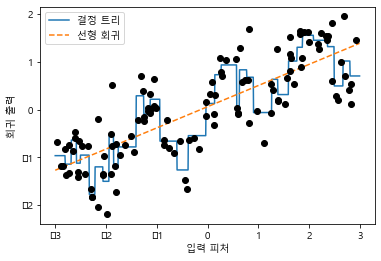

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000,endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--',label = "선형 회귀")
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel("입력 피처")
plt.legend(loc = "best")

In [21]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins = 10, strategy = "uniform")
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [22]:
kb = KBinsDiscretizer(n_bins = 10, strategy = "uniform", encode = "onehot-dense")
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 피처')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


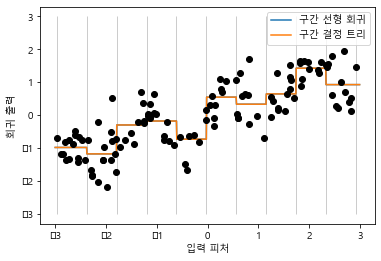

In [23]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "구간 선형 회귀")

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "구간 결정 트리")
plt.plot(X[:, 0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 피처")


In [24]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


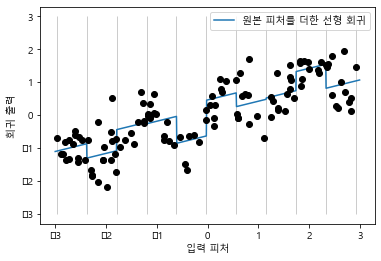

In [25]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = "원본 피처를 더한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 피처")
plt.plot(X[:,0],y,'o',c='k')

In [26]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


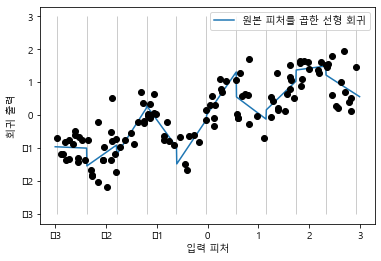

In [27]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = "원본 피처를 곱한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 피처")
plt.legend(loc = "best")

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [29]:
print("X_poly.shape: ", X_poly.shape)

X_poly.shape:  (120, 10)


In [30]:
print("X 원소: \n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [31]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


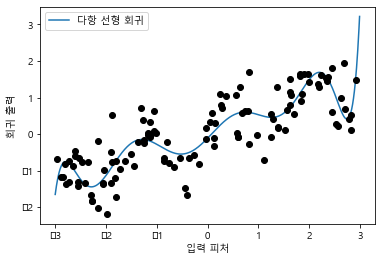

In [32]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = "다항 선형 회귀")
plt.plot(X[:,0],y,'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 피처")
plt.legend(loc = "best")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


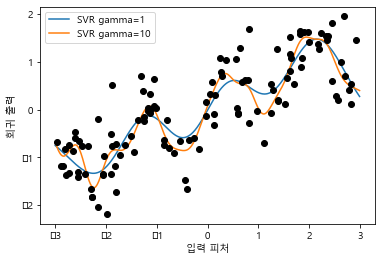

In [33]:
from sklearn.svm import SVR

for gamma in[1,10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
    
    
plt.plot(X[:, 0], y,'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 피처")
plt.legend(loc = "best")

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_oly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_oly.shape: (379, 105)


In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 피처가 없을 때 점수:{:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 피처가 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 피처가 없을 때 점수:0.621
상호작용 피처가 있을 때 점수: 0.753


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print("상호작용 피처가 없을 때 점수:{:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print("상호작용 피처가 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

# RandomForest가 낮은 이유: 복잡해서

상호작용 피처가 없을 때 점수:0.795
상호작용 피처가 있을 때 점수: 0.774


In [69]:
# 변수가 많다고 해서 모든 모델에 유의한 결과를 주는 것은 아니다.

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size = 5)

select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (564, 80)
X_train_selected.shape: (564, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False  True
 False False False  True False False False  True False False False  True
 False False False  True False False False False False False  True False
  True False False False False False  True  True False False False False
  True  True False False False False False False]


([<matplotlib.axis.YTick at 0x252676fc8c8>],
 <a list of 1 Text yticklabel objects>)

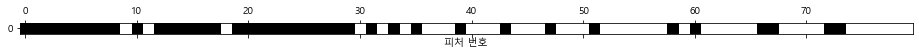

In [73]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("피처 번호")
plt.yticks([0])

In [74]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 피처를 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 피처를 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 피처를 사용한 점수: 0.800
선택된 일부 피처를 사용한 점수: 0.800


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')

In [78]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1shape:", X_train_l1.shape)

X_train.shape: (564, 80)
X_train_l1shape: (564, 40)


([<matplotlib.axis.YTick at 0x2526775cc88>],
 <a list of 1 Text yticklabel objects>)

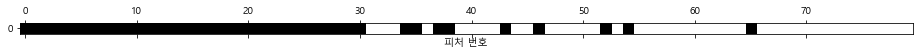

In [79]:
mask= select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("피처 번호")
plt.yticks([0])

In [80]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


([<matplotlib.axis.YTick at 0x25267803908>],
 <a list of 1 Text yticklabel objects>)

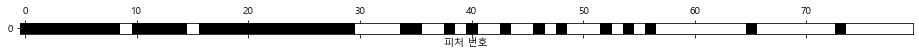

In [83]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("피처 번호")
plt.yticks([0])

In [84]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 1.000


In [ ]:
# 빨간색으로 경고메세지가 뜨는 것을 무시하고 진행하였더니
# 테스트 점수가 1.000 으로 나옵니다.

# 코드는 똑같은데 주피터의 환경이 다른것 같습니다.